In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn


In [2]:
dataset=pd.read_csv("Titanic Dataset.csv")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1 , inplace = True)
dataset


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500
414,1,1,female,39.0,0,0,108.9000
415,0,3,male,38.5,0,0,7.2500
416,0,3,male,NaN,0,0,8.0500


In [4]:
dataset.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
dtype: int64

In [5]:
dataset=dataset.fillna(method='ffill')

In [6]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

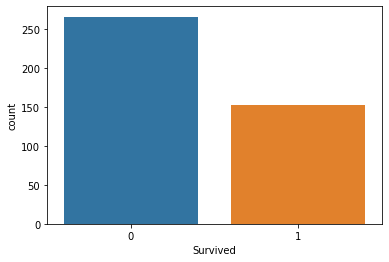

In [7]:
sns.countplot(x='Survived',data=dataset)
plt.show()

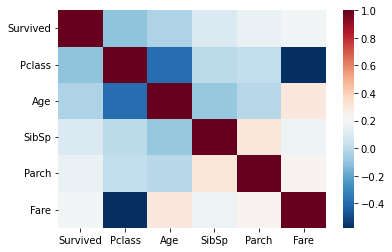

In [8]:
sns.heatmap(dataset.corr(),cmap='RdBu_r')
plt.show()

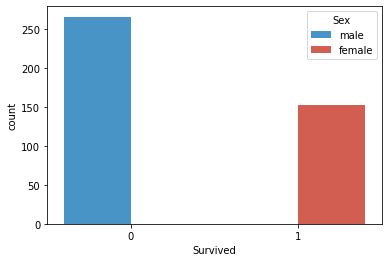

In [9]:
custom_palette = ['#3498db', '#e74c3c'] 
sns.countplot(x='Survived', hue='Sex', data = dataset, palette = custom_palette)
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder 
label_encoders = {}
le = LabelEncoder()
dataset['Sex']= le.fit_transform(dataset['Sex'])
label_encoders['Sex'] = le
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,34.5,0,0,7.8292
1,1,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,1,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,1,28.0,0,0,8.0500
414,1,1,0,39.0,0,0,108.9000
415,0,3,1,38.5,0,0,7.2500
416,0,3,1,38.5,0,0,8.0500


In [11]:
new_dataset = dataset.drop(['Survived'],axis=1)
new_dataset

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,38.5,0,0,8.0500


In [12]:
survived_dataset=dataset['Survived']
survived_dataset

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(new_dataset,survived_dataset, test_size = 0.333)


In [15]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
11,1,1,46.0,0,0,26.0000
160,3,0,26.0,0,0,7.7333
20,1,1,55.0,1,0,59.4000
116,3,1,18.0,0,0,6.4375
380,3,1,5.0,0,0,7.7500
...,...,...,...,...,...,...
40,3,1,39.0,0,1,13.4167
168,1,0,18.0,0,0,27.7208
275,2,0,20.0,1,0,26.0000
200,3,0,23.0,0,0,15.5000


In [16]:
y_train


11     0
160    1
20     0
116    0
380    0
      ..
40     0
168    1
275    1
200    1
289    0
Name: Survived, Length: 278, dtype: int64

In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
model.predict(X_test)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [20]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


In [22]:
LR.fit(X_train,y_train)


LogisticRegression()

In [23]:
prediction = LR.predict(X_test)


In [24]:
from sklearn.metrics import confusion_matrix


In [25]:
confusion_matrix(y_test,prediction)


array([[97,  0],
       [ 0, 43]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)


1.0